In [1]:
import pandas as pd 
 

import matplotlib.pyplot as plt
 

import seaborn as sns 

from sklearn.base import TransformerMixin 

from sklearn.preprocessing import (FunctionTransformer, StandardScaler) 

from sklearn.decomposition import PCA 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox 

from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve) 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline


from sklearn.base import BaseEstimator, TransformerMixin 


from collections import Counter
import warnings

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')

In [3]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [4]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [6]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [8]:
df.rename(columns={'HS-105/12':'HS-105','HS-205/20':'HS-205'},inplace=True)

In [9]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105', 'MT-111', 'CS-105',
       'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205', 'MT-222',
       'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217',
       'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302',
       'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317',
       'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412',
       'CGPA'],
      dtype='object')

In [11]:
df.drop(['Seat No.'],axis='columns',inplace=True)

In [12]:
df.head()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [14]:
missingdata= df.isnull()

In [15]:
for column in missingdata.columns.values.tolist():
    print(column)
    print(missingdata[column].value_counts())
    print("")

PH-121
False    571
Name: PH-121, dtype: int64

HS-101
False    571
Name: HS-101, dtype: int64

CY-105
False    570
True       1
Name: CY-105, dtype: int64

HS-105
False    570
True       1
Name: HS-105, dtype: int64

MT-111
False    569
True       2
Name: MT-111, dtype: int64

CS-105
False    571
Name: CS-105, dtype: int64

CS-106
False    569
True       2
Name: CS-106, dtype: int64

EL-102
False    569
True       2
Name: EL-102, dtype: int64

EE-119
False    569
True       2
Name: EE-119, dtype: int64

ME-107
False    569
True       2
Name: ME-107, dtype: int64

CS-107
False    569
True       2
Name: CS-107, dtype: int64

HS-205
False    566
True       5
Name: HS-205, dtype: int64

MT-222
False    566
True       5
Name: MT-222, dtype: int64

EE-222
False    564
True       7
Name: EE-222, dtype: int64

MT-224
False    564
True       7
Name: MT-224, dtype: int64

CS-210
False    564
True       7
Name: CS-210, dtype: int64

CS-211
False    566
True       5
Name: CS-211, dtype: int64

CS

In [16]:
df[df['HS-205'].isnull()]

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
44,D,C,NaN,NaN,NaN,C-,NaN,NaN,D+,WU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.493
137,C-,C+,WU,WU,WU,B,WU,WU,A-,C+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.653
142,C+,B-,B,A-,A,A-,C,WU,A-,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.943
143,D,D,WU,WU,WU,D,WU,WU,D,WU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000
565,F,F,D,C-,NaN,D+,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800


In [17]:
df_most_common_imputed = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [47]:
for column in df_most_common_imputed.isnull().columns.values.tolist():
    print(column)
    print (df_most_common_imputed.isnull()[column].value_counts())
    print("")

PH-121
False    547
Name: PH-121, dtype: int64

HS-101
False    547
Name: HS-101, dtype: int64

CY-105
False    547
Name: CY-105, dtype: int64

HS-105
False    547
Name: HS-105, dtype: int64

MT-111
False    547
Name: MT-111, dtype: int64

CS-105
False    547
Name: CS-105, dtype: int64

CS-106
False    547
Name: CS-106, dtype: int64

EL-102
False    547
Name: EL-102, dtype: int64

EE-119
False    547
Name: EE-119, dtype: int64

ME-107
False    547
Name: ME-107, dtype: int64

CS-107
False    547
Name: CS-107, dtype: int64

HS-205
False    547
Name: HS-205, dtype: int64

MT-222
False    547
Name: MT-222, dtype: int64

EE-222
False    547
Name: EE-222, dtype: int64

MT-224
False    547
Name: MT-224, dtype: int64

CS-210
False    547
Name: CS-210, dtype: int64

CS-211
False    547
Name: CS-211, dtype: int64

CS-203
False    547
Name: CS-203, dtype: int64

CS-214
False    547
Name: CS-214, dtype: int64

EE-217
False    547
Name: EE-217, dtype: int64

CS-212
False    547
Name: CS-212, dtype:

In [18]:
DF=df_most_common_imputed   
for i in DF.columns:
    DF.drop(DF[(DF.loc[:,i]=='WU')| (DF.loc[:,i]=='W')].index,inplace=True)
DF.reset_index(drop=True,inplace=True)
DF

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
543,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
544,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
545,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [19]:
df.head()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [48]:
for i in df.columns:
    x = df[i].value_counts()
    print("\nColumn name is:",i,"and it value is:\n",x)


Column name is: PH-121 and it value is:
 A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
A+     22
D+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64

Column name is: HS-101 and it value is:
 A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64

Column name is: CY-105 and it value is:
 A     177
A-    120
B+     50
B      49
B-     42
A+     31
D      31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64

Column name is: HS-105 and it value is:
 A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
A+    34
D+    34
WU     2
F      1
Name: HS-105, dtype: int64

Column name is: MT-111 and it value is:
 A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64

Column name is: CS-105 and it value is:

In [49]:
for i in df_most_common_imputed.columns:
    x = df_most_common_imputed[i].value_counts()
    print("\nColumn name is:",i,"and it value is:\n",x)


Column name is: PH-121 and it value is:
 A-    112
A     110
B+     58
B      56
B-     53
D      37
C      31
C+     30
A+     22
D+     22
C-     15
F       1
Name: PH-121, dtype: int64

Column name is: HS-101 and it value is:
 A-    80
B-    75
C     67
B     62
B+    58
C-    48
C+    45
D     40
A     38
D+    29
A+     4
F      1
Name: HS-101, dtype: int64

Column name is: CY-105 and it value is:
 A     174
A-    117
B+     49
B      46
B-     39
A+     31
D      27
C      19
C-     16
C+     15
D+     14
Name: CY-105, dtype: int64

Column name is: HS-105 and it value is:
 A     95
A-    71
B+    69
B     56
D     41
B-    39
C     37
C+    36
C-    36
A+    34
D+    33
Name: HS-105, dtype: int64

Column name is: MT-111 and it value is:
 A-    105
A      99
B-     67
B+     61
B      52
C-     36
C+     33
C      28
A+     23
D      23
D+     19
F       1
Name: MT-111, dtype: int64

Column name is: CS-105 and it value is:
 A     148
A-    133
B+     59
B      47
A+     42
B-    

In [50]:
DF=df_most_common_imputed   
for i in DF.columns:
    DF.drop(DF[(DF.loc[:,i]=='WU')| (DF.loc[:,i]=='W')].index,inplace=True)
DF.reset_index(drop=True,inplace=True)
DF

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
543,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
544,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
545,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [51]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PH-121  547 non-null    object 
 1   HS-101  547 non-null    object 
 2   CY-105  547 non-null    object 
 3   HS-105  547 non-null    object 
 4   MT-111  547 non-null    object 
 5   CS-105  547 non-null    object 
 6   CS-106  547 non-null    object 
 7   EL-102  547 non-null    object 
 8   EE-119  547 non-null    object 
 9   ME-107  547 non-null    object 
 10  CS-107  547 non-null    object 
 11  HS-205  547 non-null    object 
 12  MT-222  547 non-null    object 
 13  EE-222  547 non-null    object 
 14  MT-224  547 non-null    object 
 15  CS-210  547 non-null    object 
 16  CS-211  547 non-null    object 
 17  CS-203  547 non-null    object 
 18  CS-214  547 non-null    object 
 19  EE-217  547 non-null    object 
 20  CS-212  547 non-null    object 
 21  CS-215  547 non-null    object 
 22  MT

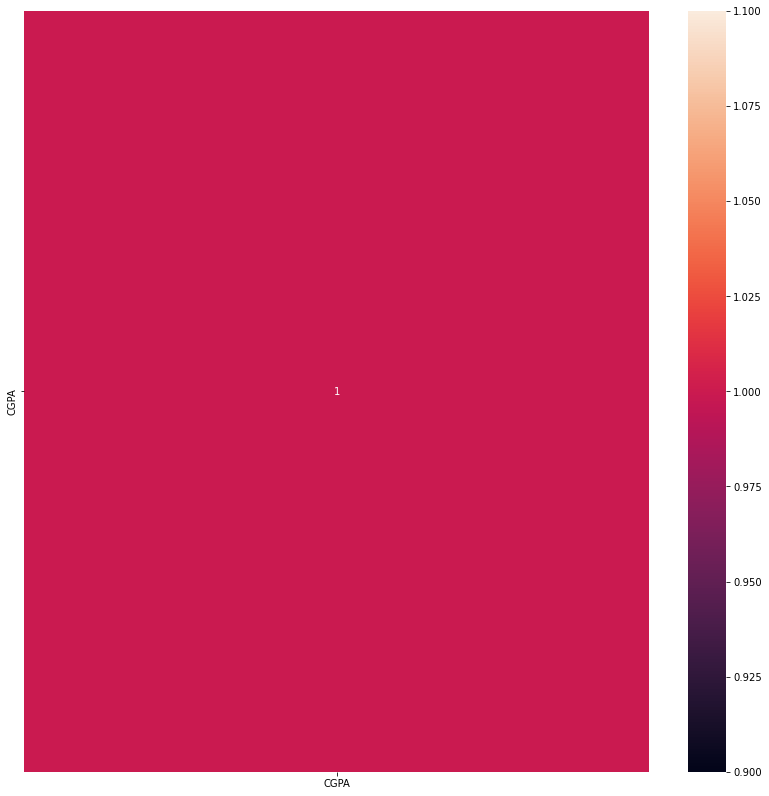

In [23]:
plt.figure(figsize=(14,14))
sns.heatmap(DF.corr(),annot=True)
plt.show()

In [24]:
Z=DF.drop(['CGPA'],axis='columns')
Z

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C,C-,C-,C-,C-,A-,A,C-,B,A-
1,A,D,D+,D,B-,C,D,A,D+,D,...,D,D+,D,C,D,A-,B-,C,C,B
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,A-,B,B,A,C,A,A,A,A-,A
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,C-,D+,C,D+,C-,B-,B,C+,C+,C+
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,A-,B-,B+,B+,B-,A-,A,A-,A-,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,B,A,A,A-,A+,A,A-,A-,A+,B+,...,B+,A-,A-,A,A,A,B+,B+,B,A
543,A+,A,A,A,A,A,A,A-,A,A,...,A-,B+,B+,A,A,A-,B,A-,C,A-
544,B,A,A-,B+,A,A,A,A,A,B,...,B+,A-,B,A,B+,A,C,B+,A-,A-
545,A,B+,D,A,D,D+,B-,C-,B-,C-,...,B+,D,B,B,C-,D,C,B,B-,C


In [46]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PH-121  547 non-null    object 
 1   HS-101  547 non-null    object 
 2   CY-105  547 non-null    object 
 3   HS-105  547 non-null    object 
 4   MT-111  547 non-null    object 
 5   CS-105  547 non-null    object 
 6   CS-106  547 non-null    object 
 7   EL-102  547 non-null    object 
 8   EE-119  547 non-null    object 
 9   ME-107  547 non-null    object 
 10  CS-107  547 non-null    object 
 11  HS-205  547 non-null    object 
 12  MT-222  547 non-null    object 
 13  EE-222  547 non-null    object 
 14  MT-224  547 non-null    object 
 15  CS-210  547 non-null    object 
 16  CS-211  547 non-null    object 
 17  CS-203  547 non-null    object 
 18  CS-214  547 non-null    object 
 19  EE-217  547 non-null    object 
 20  CS-212  547 non-null    object 
 21  CS-215  547 non-null    object 
 22  MT

In [29]:
first_three_years= Z
for column in Z.columns[Z.columns.str.contain('-4')]:
    first_three_years.drop([column],axis= 'columns', inplace=True)
    
first_three_years
    

AttributeError: 'StringMethods' object has no attribute 'contain'

In [30]:
first_three_years=Z
for column in Z.columns[Z.columns.str.contains('-4')]:
    first_three_years.drop([column],axis='columns',inplace=True)

first_three_years

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C+,B,C,C+,C,C-,C,C-,C-
1,A,D,D+,D,B-,C,D,A,D+,D,...,D,C-,A-,D+,C-,C,A-,D,D+,D
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,C+,A,B+,A-,B,B+,A-,A-,B,B
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D,B-,D,B-,D+,D+,B+,C-,D+,C
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,C-,A-,B-,A-,C+,A-,B-,A-,B-,B+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,B,A,A,A-,A+,A,A-,A-,A+,B+,...,B,A-,A-,A,A+,A,A,B+,A-,A-
543,A+,A,A,A,A,A,A,A-,A,A,...,A,A,A,A,A,A,A+,A-,B+,B+
544,B,A,A-,B+,A,A,A,A,A,B,...,B,B-,B+,B+,A,B,C+,B+,A-,B
545,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,C,C,C+,C-,D,B-,B+,D,B


In [33]:
first_three_years.columns[first_three_years.columns.str.contains('-4')]

Index([], dtype='object')

In [34]:
first_three_years.shape

(547, 33)

In [45]:
DF.head()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [43]:
first_three_years.columns[first_three_years.columns.str.contains('-4')]

Index([], dtype='object')

In [38]:
first_two_years=first_three_years
for column in first_three_years.columns[first_three_years.columns.str.contains('-3')]:
    first_two_years.drop([column],axis='columns',inplace=True)
first_two_years
    

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,D,A-,B-,C+,D+,D+,D,A,D,C-
1,A,D,D+,D,B-,C,D,A,D+,D,...,B-,C-,D+,D+,D,C,D,B-,C,D
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,A,A,A,A,A+,A,A-,A,A-,A
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,B-,D,C,B+,C+,D,D+,D,D
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,A,A-,A-,A-,B-,A,A-,A,A-,A-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A+,A,A,A,A,A+,A,A,B,A-
543,A+,A,A,A,A,A,A,A-,A,A,...,C+,A-,B,A,A,A+,A+,A,A,B
544,B,A,A-,B+,A,A,A,A,A,B,...,B,B+,B,A-,A,B+,B,A,B+,B
545,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,D,B,B-,B,B-,C,B-,D+,D+


In [54]:
from sklearn.tree import DecisionTreeRegressor

X_train,X_test,Y_train,Y_test = train_test_split(first_three_years,DF[['CGPA']],test_size=0.40,random_state=0)
decisiontree = DecisionTreeRegressor()
dec_tree = decisiontree.fit(X_train, Y_train)

ValueError: could not convert string to float: 'B+'

In [55]:
Yhat2=dec_tree.predict(X_test)

NameError: name 'dec_tree' is not defined